In [4]:
import wandb
import json
from datasets import Dataset, DatasetDict
import numpy as np
from tqdm.auto import tqdm

In [2]:
f = open(r"C:\Users\Leandro\Desktop\WandB_Projects\LLM_alpaca\alpaca_data_cleaned.json")
data = json.load(f)
f.close()

In [3]:
data

[{'instruction': 'Give three tips for staying healthy.',
  'input': '',
  'output': '1. Eat a balanced and nutritious diet: Make sure your meals are inclusive of a variety of fruits and vegetables, lean protein, whole grains, and healthy fats. This helps to provide your body with the essential nutrients to function at its best and can help prevent chronic diseases.\n\n2. Engage in regular physical activity: Exercise is crucial for maintaining strong bones, muscles, and cardiovascular health. Aim for at least 150 minutes of moderate aerobic exercise or 75 minutes of vigorous exercise each week.\n\n3. Get enough sleep: Getting enough quality sleep is crucial for physical and mental well-being. It helps to regulate mood, improve cognitive function, and supports healthy growth and immune function. Aim for 7-9 hours of sleep each night.'},
 {'instruction': 'What are the three primary colors?',
  'input': '',
  'output': 'The three primary colors are red, blue, and yellow. These colors are c

In [ ]:
# Recorrer cada diccionario en la lista
len_instruction = []
len_output = []
cant_input = []
for diccionario in tqdm(data):
    # Obtener la instrucción del diccionario
    instruccion = diccionario['instruction']
    output = diccionario['output']
    input = diccionario['input']
    
    # Contar la cantidad de caracteres en la instrucción
    len_instruction.append(len(instruccion))
    len_output.append(len(output))
    cant_input.append(min(len(input), 1))

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

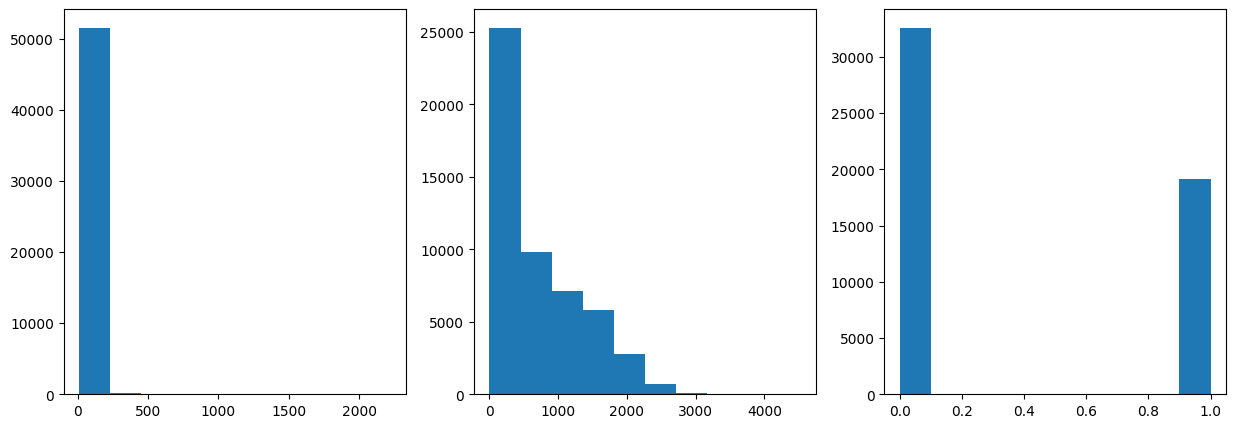

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
for i, h in enumerate([len_instruction, len_output, cant_input]):
    ax[i].hist(h)
plt.show()

In [ ]:
titles = ["Length of instruction", "Length of output", "Has input"]
table_name = ["Length_of_instruction", "Length_of_output", "Has_input"]
tables = []
with wandb.init(project = "LLM_alpaca", name = "Histograms"):
	for i, h in enumerate([len_instruction, len_output, cant_input]):
		h = [[s] for s in h]
		tables.append(wandb.Table(data=h, columns=["data"]))
		wandb.log({table_name[i], wandb.plot.histogram(tables[i], "data", title=titles[i])})

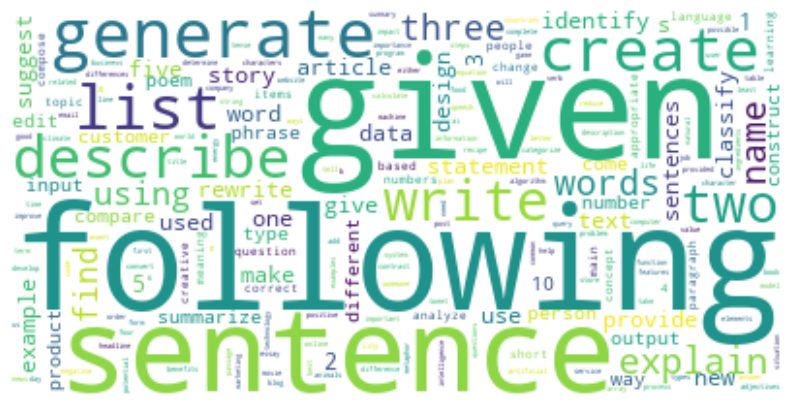

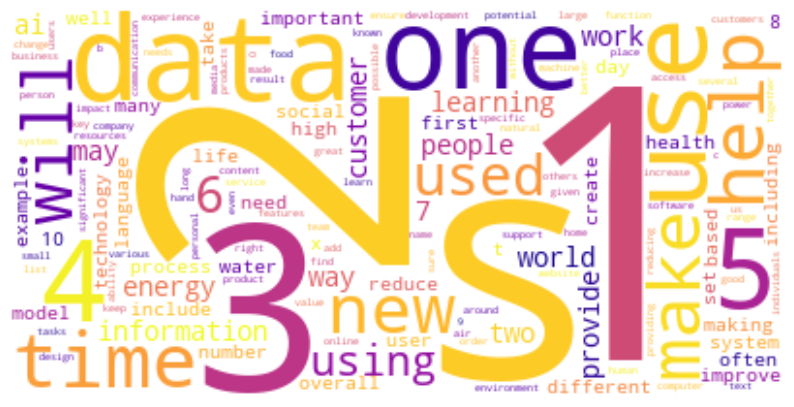

In [24]:
import re
import string
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Lista de stopwords en inglés
stopwords = set(STOPWORDS)

# Combinar todas las instrucciones en una sola cadena
instrucciones_texto = ' '.join([d['instruction'] for d in data])

# Preprocesamiento del texto
instrucciones_texto = instrucciones_texto.lower()
instrucciones_texto = re.sub(r'[' + string.punctuation + ']+', ' ', instrucciones_texto)

# Remover stopwords
palabras_instrucciones = [palabra for palabra in instrucciones_texto.split() if palabra not in stopwords]

# Contar las palabras
contador_instrucciones = Counter(palabras_instrucciones)

# Repite el mismo proceso para las salidas
outputs_texto = ' '.join([d['output'] for d in data])
outputs_texto = outputs_texto.lower()
outputs_texto = re.sub(r'[' + string.punctuation + ']+', ' ', outputs_texto)

palabras_outputs = [palabra for palabra in outputs_texto.split() if palabra not in stopwords]

contador_outputs = Counter(palabras_outputs)

# Generar la nube de palabras para las instrucciones
wordcloud_instrucciones = WordCloud(stopwords=stopwords, background_color='white', colormap='viridis').generate_from_frequencies(contador_instrucciones)

# Generar la nube de palabras para las salidas
wordcloud_outputs = WordCloud(stopwords=stopwords, background_color='white', colormap='plasma').generate_from_frequencies(contador_outputs)

# Mostrar la nube de palabras para las instrucciones
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_instrucciones, interpolation='bilinear')
plt.axis('off')
plt.show()

# Mostrar la nube de palabras para las salidas
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_outputs, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
with wandb.init(project = "LLM_alpaca", name = "Histograms"):
    # Guardar las nubes de palabras como imágenes
    wordcloud_instrucciones.to_file('instrucciones_wordcloud.png')
    wordcloud_outputs.to_file('outputs_wordcloud.png')

    # Subir las imágenes a wandb
    wandb.log({'instrucciones_wordcloud': wandb.Image('instrucciones_wordcloud.png')})
    wandb.log({'outputs_wordcloud': wandb.Image('outputs_wordcloud.png')})